In [65]:
import pandas as pd
from collections import Counter
import numpy as np

In [66]:
data = pd.read_csv('train.csv', index_col='PassengerId')
test_data = pd.read_csv('test.csv', index_col='PassengerId')

In [4]:
data.loc[data['Sex'] == 'male', 'Sex'] = 1
data.loc[data['Sex'] == 'female', 'Sex'] = 2

test_data.loc[test_data['Sex'] == 'male', 'Sex'] = 1
test_data.loc[test_data['Sex'] == 'female', 'Sex'] = 2

In [68]:
data.loc[data['Age'].isna(), 'Age'] = 30

test_data.loc[test_data['Age'].isna(), 'Age'] = 30

In [6]:
data['Age'] = (data['Age'] * 100).astype('int')

test_data['Age'] = (test_data['Age'] * 100).astype('int')

In [69]:
# data['Fare'] = (data['Fare'] * 10000).astype('int')

test_data.loc[test_data['Fare'].isna(), 'Fare'] = test_data['Fare'].mean()
# test_data['Fare'] = (test_data['Fare'] * 10000).astype('int')

In [70]:
data.loc[data['Embarked'].isna(), 'Embarked'] = 'S'

test_data.loc[test_data['Embarked'].isna(), 'Embarked'] = 'S'

In [9]:
data.loc[data['Embarked'] == 'S', 'Embarked'] = 1
data.loc[data['Embarked'] == 'C', 'Embarked'] = 2
data.loc[data['Embarked'] == 'Q', 'Embarked'] = 3

test_data.loc[test_data['Embarked'] == 'S', 'Embarked'] = 1
test_data.loc[test_data['Embarked'] == 'C', 'Embarked'] = 2
test_data.loc[test_data['Embarked'] == 'Q', 'Embarked'] = 3

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

def check_regression(x_train, y_train, x_test, y_test):
    model = LinearRegression()
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    y_pred = (y_pred >= 0.5)
    print(accuracy_score(y_test, y_pred))

In [10]:
X = data.drop(columns=['Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
X.shape

(891, 1)

In [11]:
data.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name  Sex   Age  \
PassengerId                                                                 
1                                      Braund, Mr. Owen Harris    1  2200   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...    2  3800   
3                                       Heikkinen, Miss. Laina    2  2600   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)    2  3500   
5                                     Allen, Mr. William Henry    1  3500   

             SibSp  Parch            Ticket    Fare Cabin  Embarked  
PassengerId                                                          
1                1      0         A/5 21171   72500   NaN         1  
2                1      0          PC 17599  712833   C85         2  
3                0      0  STON/O2. 3101282   79250   NaN         1  
4                1      0            113803  531000  C123         1  
5                0      0            373450   80500   NaN         1

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

for column in columns:
    X = np.array([data[column]]).reshape([891, 1])
    y = data['Survived'].to_numpy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    print(column, ": ", end='')
    check_regression(X_train, y_train, X_test, y_test)

Pclass : 0.6983050847457627
Sex : 0.7966101694915254
Age : 0.5932203389830508
SibSp : 0.5932203389830508
Parch : 0.5898305084745763
Fare : 0.6406779661016949
Embarked : 0.5796610169491525


In [131]:
(data.loc[data['Survived'] == 1, 'Sex']).value_counts()

# 468, 81
# 233, 109

female    233
male      109
Name: Sex, dtype: int64

In [14]:
X = data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'Age', 'Fare'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

check_regression(X_train, y_train, X_test, y_test)

0.8067796610169492


In [46]:
from sklearn.linear_model import LogisticRegression

X = data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
model = LogisticRegression(random_state=0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred = model.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.8406779661016949

In [57]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0, max_depth=3, criterion='entropy')

In [58]:
X = data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [59]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8203389830508474

In [60]:
from sklearn import tree

[Text(167.4, 190.26, 'X[1] <= 1.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(83.7, 135.9, 'X[2] <= 350.0\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 3.0\nentropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 522771.0\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.58\nsamples = 332\nvalue = [286, 46]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.956\nsamples = 45\nvalue = [28, 17]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 250.0\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 1.

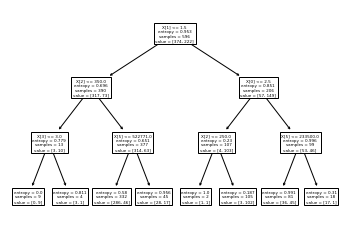

In [61]:
tree.plot_tree(clf)

In [62]:
import matplotlib.pyplot as plt

In [64]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import BatchNormalization

Using TensorFlow backend.
/home/green-tea/miniconda3/envs/habitat/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/green-tea/miniconda3/envs/habitat/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/green-tea/miniconda3/envs/habitat/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home

In [65]:
X = data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'Age', 'Fare'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
model = Sequential()
model.add(Dense(input_dim=X.shape[1], units=128,
                 kernel_initializer='normal', bias_initializer='zeros'))
model.add(Activation('relu'))

for i in range(0, 15):
    model.add(Dense(units=128, kernel_initializer='normal',
                     bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Dropout(.40))

model.add(Dense(units=2))
model.add(Activation('softmax'))

In [67]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [539]:
y_train = pd.get_dummies(y_train)

In [540]:
model.fit(X_train, y_train, epochs=500, verbose=2)

Epoch 1/500
 - 3s - loss: 0.6812 - acc: 0.6091
Epoch 2/500
 - 0s - loss: 0.6644 - acc: 0.6275
Epoch 3/500
 - 0s - loss: 0.6627 - acc: 0.6275
Epoch 4/500
 - 0s - loss: 0.6620 - acc: 0.6275
Epoch 5/500
 - 0s - loss: 0.6609 - acc: 0.6275
Epoch 6/500
 - 0s - loss: 0.6636 - acc: 0.6275
Epoch 7/500
 - 0s - loss: 0.6586 - acc: 0.6275
Epoch 8/500
 - 0s - loss: 0.6173 - acc: 0.6275
Epoch 9/500
 - 0s - loss: 0.6215 - acc: 0.6275
Epoch 10/500
 - 0s - loss: 0.6294 - acc: 0.6208
Epoch 11/500
 - 0s - loss: 0.6056 - acc: 0.6527
Epoch 12/500
 - 0s - loss: 0.6191 - acc: 0.6577
Epoch 13/500
 - 0s - loss: 0.6220 - acc: 0.6812
Epoch 14/500
 - 0s - loss: 0.5801 - acc: 0.6930
Epoch 15/500
 - 0s - loss: 0.5673 - acc: 0.7617
Epoch 16/500
 - 0s - loss: 0.5985 - acc: 0.7517
Epoch 17/500
 - 0s - loss: 0.5332 - acc: 0.7768
Epoch 18/500
 - 0s - loss: 0.5829 - acc: 0.7517
Epoch 19/500
 - 0s - loss: 0.5893 - acc: 0.7500
Epoch 20/500
 - 0s - loss: 0.5682 - acc: 0.7517
Epoch 21/500
 - 0s - loss: 0.5572 - acc: 0.7634
E

Epoch 171/500
 - 0s - loss: 0.4615 - acc: 0.8121
Epoch 172/500
 - 0s - loss: 0.4557 - acc: 0.8138
Epoch 173/500
 - 0s - loss: 0.4599 - acc: 0.8138
Epoch 174/500
 - 0s - loss: 0.4463 - acc: 0.8171
Epoch 175/500
 - 0s - loss: 0.4499 - acc: 0.8037
Epoch 176/500
 - 0s - loss: 0.4174 - acc: 0.8339
Epoch 177/500
 - 0s - loss: 0.4304 - acc: 0.8289
Epoch 178/500
 - 0s - loss: 0.4472 - acc: 0.8205
Epoch 179/500
 - 0s - loss: 0.4370 - acc: 0.8289
Epoch 180/500
 - 0s - loss: 0.4411 - acc: 0.8221
Epoch 181/500
 - 0s - loss: 0.4244 - acc: 0.8221
Epoch 182/500
 - 0s - loss: 0.4360 - acc: 0.8138
Epoch 183/500
 - 0s - loss: 0.4551 - acc: 0.8054
Epoch 184/500
 - 0s - loss: 0.4331 - acc: 0.8272
Epoch 185/500
 - 0s - loss: 0.4397 - acc: 0.8289
Epoch 186/500
 - 0s - loss: 0.4337 - acc: 0.8205
Epoch 187/500
 - 0s - loss: 0.4449 - acc: 0.8238
Epoch 188/500
 - 0s - loss: 0.4432 - acc: 0.8221
Epoch 189/500
 - 0s - loss: 0.4354 - acc: 0.8154
Epoch 190/500
 - 0s - loss: 0.4470 - acc: 0.8188
Epoch 191/500
 - 0s 

Epoch 339/500
 - 0s - loss: 0.4410 - acc: 0.8221
Epoch 340/500
 - 0s - loss: 0.4669 - acc: 0.8171
Epoch 341/500
 - 0s - loss: 0.4716 - acc: 0.8121
Epoch 342/500
 - 0s - loss: 0.4503 - acc: 0.8171
Epoch 343/500
 - 0s - loss: 0.4337 - acc: 0.8188
Epoch 344/500
 - 0s - loss: 0.4361 - acc: 0.8322
Epoch 345/500
 - 0s - loss: 0.4675 - acc: 0.8020
Epoch 346/500
 - 0s - loss: 0.4562 - acc: 0.8037
Epoch 347/500
 - 0s - loss: 0.4333 - acc: 0.8154
Epoch 348/500
 - 0s - loss: 0.4282 - acc: 0.8305
Epoch 349/500
 - 0s - loss: 0.4692 - acc: 0.8104
Epoch 350/500
 - 0s - loss: 0.4279 - acc: 0.8238
Epoch 351/500
 - 0s - loss: 0.4390 - acc: 0.8272
Epoch 352/500
 - 0s - loss: 0.4338 - acc: 0.8205
Epoch 353/500
 - 0s - loss: 0.4296 - acc: 0.8255
Epoch 354/500
 - 0s - loss: 0.4220 - acc: 0.8322
Epoch 355/500
 - 0s - loss: 0.4385 - acc: 0.8289
Epoch 356/500
 - 0s - loss: 0.4282 - acc: 0.8289
Epoch 357/500
 - 0s - loss: 0.4332 - acc: 0.8238
Epoch 358/500
 - 0s - loss: 0.4240 - acc: 0.8289
Epoch 359/500
 - 0s 

In [541]:
y_pred = model.predict(X_test)

In [542]:
y_pred

array([[2.9549772e-01, 7.0450228e-01],
       [7.5951695e-01, 2.4048300e-01],
       [7.4862319e-01, 2.5137684e-01],
       [3.0845225e-02, 9.6915472e-01],
       [3.7904292e-01, 6.2095702e-01],
       [9.2658389e-21, 1.0000000e+00],
       [2.6940632e-01, 7.3059368e-01],
       [7.1509653e-01, 2.8490347e-01],
       [2.6940632e-01, 7.3059368e-01],
       [6.2780236e-15, 1.0000000e+00],
       [5.0731462e-01, 4.9268538e-01],
       [7.4862319e-01, 2.5137684e-01],
       [4.6899858e-01, 5.3100139e-01],
       [7.3428506e-01, 2.6571497e-01],
       [7.5951695e-01, 2.4048300e-01],
       [3.1377856e-02, 9.6862215e-01],
       [5.0731462e-01, 4.9268538e-01],
       [2.6940632e-01, 7.3059368e-01],
       [7.5951695e-01, 2.4048300e-01],
       [5.9657663e-01, 4.0342334e-01],
       [7.4862319e-01, 2.5137684e-01],
       [5.9657663e-01, 4.0342334e-01],
       [5.2376401e-01, 4.7623590e-01],
       [7.4862319e-01, 2.5137684e-01],
       [7.4862319e-01, 2.5137684e-01],
       [5.5462009e-01, 4.

In [543]:
y_pred = y_pred.argmax(axis=1)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0])

In [544]:
accuracy_score(y_test, y_pred)

0.7728813559322034

In [39]:
test_data.head()

Pclass                                          Name  Sex   Age  \
PassengerId                                                                    
892               3                              Kelly, Mr. James    1  3450   
893               3              Wilkes, Mrs. James (Ellen Needs)    2  4700   
894               2                     Myles, Mr. Thomas Francis    1  6200   
895               3                              Wirz, Mr. Albert    1  2700   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    2  2200   

             SibSp  Parch   Ticket    Fare Cabin  Embarked  
PassengerId                                                 
892              0      0   330911   78292   NaN         3  
893              1      0   363272   70000   NaN         1  
894              0      0   240276   96875   NaN         3  
895              0      0   315154   86625   NaN         1  
896              1      1  3101298  122875   NaN         1

In [36]:
X = test_data.drop(columns=['Name', 'Ticket', 'Cabin'])

In [37]:
y_pred = model.predict(X)

In [38]:
df = pd.DataFrame({'PassengerId': test_data.index, 'Survived': y_pred}) 

In [39]:
df.to_csv('out.csv', index = False)

In [45]:
df

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [2]:
from catboost import CatBoostClassifier

In [10]:
data.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name  Sex   Age  \
PassengerId                                                                 
1                                      Braund, Mr. Owen Harris    1  2200   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...    2  3800   
3                                       Heikkinen, Miss. Laina    2  2600   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)    2  3500   
5                                     Allen, Mr. William Henry    1  3500   

             SibSp  Parch            Ticket    Fare Cabin  Embarked  
PassengerId                                                          
1                1      0         A/5 21171   72500   NaN         1  
2                1      0          PC 17599  712833   C85         2  
3                0      0  STON/O2. 3101282   79250   NaN         1  
4                1      0            113803  531000  C123         1  
5                0      0            373450   80500   NaN         1

In [105]:
X = data.drop(columns=['Survived', 'Cabin'])
cat_features = [2, 8]
text_features = [1, 6]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [106]:
X

Pclass                                               Name  \
PassengerId                                                              
1                 3                            Braund, Mr. Owen Harris   
2                 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3                 3                             Heikkinen, Miss. Laina   
4                 1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5                 3                           Allen, Mr. William Henry   
...             ...                                                ...   
887               2                              Montvila, Rev. Juozas   
888               1                       Graham, Miss. Margaret Edith   
889               3           Johnston, Miss. Catherine Helen "Carrie"   
890               1                              Behr, Mr. Karl Howell   
891               3                                Dooley, Mr. Patrick   

                Sex   Age  SibSp  Parch            Ticket     Fare Embarked  
PassengerId                                                                  
1              male  22.0      1      0         A/5 21171   7.2500        S  
2            female  38.0      1      0          PC 17599  71.2833        C  
3            female  26.0      0      0  STON/O2. 3101282   7.9250        S  
4            female  35.0      1      0            113803  53.1000        S  
5              male  35.0      0      0            373450   8.0500        S  
...             ...   ...    ...    ...               ...      ...      ...  
887            male  27.0      0      0            211536  13.0000        S  
888          female  19.0      0      0            112053  30.0000        S  
889          female  30.0      1      2        W./C. 6607  23.4500        S  
890            male  26.0      0      0            111369  30.0000        C  
891            male  32.0      0      0            370376   7.7500        Q  

[891 rows x 9 columns]

In [104]:
d = dict()

for index in range(1, len(data['Cabin']) + 1):
    
    cabin = data['Cabin'][index]
    
    if cabin != cabin:
        continue

    ch = cabin[0]
    ch += str(data['Survived'][index])
    
    if ch in d:
        d[ch] += 1
    else:
        d[ch] = 1
        
print(d)
    
d2 = {}
for key in d:
    ch = key[0]
    
    if ch in d2:
        continue
    else:
        d2[ch] = 1
        
    ch1 = ch + str(0)
    ch2 = ch + str(1)
    
    print(ch + ": " + str(d[ch1] / (d[ch1] + d[ch2])))

{'C1': 35, 'E0': 8, 'G1': 2, 'D1': 25, 'A1': 7, 'C0': 24, 'B1': 35, 'B0': 12, 'F1': 8, 'F0': 5, 'A0': 8, 'D0': 8, 'E1': 24, 'G0': 2, 'T0': 1}
C: 0.4067796610169492
E: 0.25
G: 0.5
D: 0.24242424242424243
A: 0.5333333333333333
B: 0.2553191489361702
F: 0.38461538461538464


KeyError: 'T1'

In [118]:
model = CatBoostClassifier(iterations=3000,
                           depth=16,
                           learning_rate=0.1,
                           loss_function='Logloss',
                           verbose=True)

In [119]:
model.fit(X_train, y_train, cat_features=cat_features, text_features=text_features)

0:	learn: 0.6317628	total: 111ms	remaining: 5m 33s
1:	learn: 0.5892923	total: 8.89s	remaining: 3h 42m
2:	learn: 0.5480829	total: 10.7s	remaining: 2h 58m 23s
3:	learn: 0.5121688	total: 14.5s	remaining: 3h 48s
4:	learn: 0.4901101	total: 14.5s	remaining: 2h 24m 38s


KeyboardInterrupt: 

In [115]:
y_pred = model.predict(X_test)

In [116]:
accuracy_score(y_test, y_pred)

0.8372881355932204

In [148]:
d = data[data['Age'] > 70]['Survived'].value_counts()

d[0] / (d[0] + d[1])

0.8